In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import arviz as az

In [2]:
plt.style.use('arviz-darkgrid')  # aplica estilo a los gr√°ficos
np.random.seed(42)  # semilla para fijar n√∫meros aleatorios

## Probabilidades

_La matem√°tica es la l√≥gica de la certeza mientras que la probabilidad es la l√≥gica de la incerteza_, dice Joseph K. Blitzstein condensando el pensamiento de cientos de personas antes que el. Entender como pensar en presencia de incertezas es central en Ciencia de Datos. Esta incerteza proviene de diversas fuentes, incluyendo datos incompletos, errores de medici√≥n, l√≠mites de los dise√±os experimentales, dificultad de observar ciertos eventos, aproximaciones, etc.

A continuaci√≥n veremos una breve introducci√≥n a conceptos centrales en probabilidad a partir de lo cuales podremos comprender mejor los fundamentos del modelado Bayesiano. Para quienes tengan inter√©s en profundizar en el tema recomiendo leer el libro [Introduction to Probability](https://www.crcpress.com/Introduction-to-Probability/Blitzstein-Hwang/p/book/9781466575578) de Joseph K. Blitzstein y Jessica Hwang.

Empecemos por el concepto de _probabilidad_, existen al menos tres grandes _definiciones_ de probabilidad:

* Decimos que una moneda tiene probabilidad 0,5 (o 50%) de caer cara, por que asumimos que ninguno de los dos eventos, {cara, ceca}, tiene preferencia sobre el otro. Es decir, pensamos que ambos eventos son equi-probables. Esto se conoce como definici√≥n cl√°sica o na√≠f. Es la misma que usamos para decir que la probabilidad de obtener 3 al arrojar un dado es de $\frac{1}{6}$, o que la probabilidad de tener una hija es de 0,5. Esta definici√≥n se lleva a las patadas con preguntas como ¬øCu√°l es la probabilidad de existencia de vida en Marte?, claramente 0,5 es una sobreestimaci√≥n, ya que el evento _vida_ y el evento _no-vida_ no son igualmente probables.

* Otra forma de ver a una probabilidad es bajo el prisma frecuentista. En esta concepci√≥n de probabilidad, en vez de asumir que los eventos son igualmente probables, dise√±amos un experimento (en el sentido amplio de la palabra) y contamos cuantas veces observamos el evento que nos interesa $x$ respecto del total de intentos $n$. Entonces podemos aproximar la probabilidad mediante la frecuencia relativa $\frac{n_x}{n}$, seg√∫n este procedimiento la probabilidad de obtener 3 al arrojar un dado no es necesariamente de $\frac{1}{6}$ si no que bien podr√≠a ser $\frac{1}{3}$. Esta noci√≥n de probabilidad se suele asociar con la idea de la existencia de un n√∫mero _correcto_ al que nos aproximamos a medida que aumentan los intentos $n$. Por lo tanto, podemos definir formalmente probabilidad como:

$$p(x) = \lim_{n \rightarrow \infty} \frac{n_x}{n}$$

La definici√≥n frecuentista de probabilidad tiene el inconveniente de no ser muy √∫til para pensar en problemas que ocurren una sola vez. Por ejemplo, ¬øCu√°l es la probabilidad que ma√±ana llueva? Estrictamente solo hay un ma√±ana y o bien llover√° o bien no. Los frecuentistas suelen evadir este problema recurriendo a experimentos imaginarios. En ese caso podr√≠amos intentar estimar la probabilidad de lluvia para ma√±ana imaginando que hay una cantidad muy grande de _ma√±anas_ y luego contando en cuantos de esos _ma√±anas_ llueve y en cuantos no. Esta _ficci√≥n cient√≠fica_ es perfectamente v√°lida y muy √∫til.

* La tercer forma de pensar una probabilidad se refiere a cuantificar la incertidumbre que tenemos sobre la posibilidad que un evento suceda. Si el evento es imposible entonces la probabilidad de ese evento ser√° exactamente 0, si en cambio el evento sucede siempre entonces la probabilidad de ese evento ser√° de 1. Todos los valores intermedios reflejan grados de certeza/incerteza. Desde este punto de vista es _natural_ preguntarse cual es la probabilidad que la masa de Saturno sea $x$ kg, o hablar sobre la probabilidad de lluvia durante el 25 de Mayo de 1810, o la probabilidad de que ma√±ana amanezca. Esta tercer interpretaci√≥n del concepto de probabilidad es llamado Bayesiana y se puede pensar como una versi√≥n que incluye, como casos especiales, a las definiciones frecuentista y cl√°sica.


Independientemente de la interpretaci√≥n del concepto de **probabilidad** la teor√≠a de probabilidades nos ofrece un marco √∫nico, coherente y riguroso para trabajar con probabilidades.

## Probabilidades y conjuntos

El marco matem√°tico para trabajar con las probabilidades se construye alrededor de los conjuntos matem√°ticos. 

El espacio muestral $\mathcal{X}$ es el conjunto de todos los posibles resultados de un experimento. Un evento $A$ es un subconjunto de $\mathcal{X}$. Decimos que $A$ ha ocurrido si al realizar un _experimento_ obtenemos como resultado $A$. Si tuvi√©ramos un t√≠pico dado de 6 caras tendr√≠amos que:

$$\mathcal{X} = \{1, 2, 3, 4, 5, 6\} \tag {0.0}$$

Podemos definir al evento $A$ como:

$$A = \{2\} \tag {0.1}$$

Si queremos indicar la probabilidad del evento $A$ escribimos $P(A=2)$ o de forma abreviada $P(A)$. 

$P(A)$ puede tomar cualquier valor en el intervalo comprendido entre 0 y 1 (incluidos ambos extremos), en [notaci√≥n de intervalos](https://es.wikipedia.org/wiki/Intervalo_(matem%C3%A1tica)#Notaci%C3%B3n) esto se escribe como [0, 1]. Es importante notar que no es necesariamente cierto que $P(A) = \frac{1}{6}$.

Al definir el evento $A$ podemos usar m√°s de un elemento de $\mathcal{X}$. Algunos ejemplos ser√≠an obtener un n√∫mero impar (siempre dentro de $\mathcal{X}$) $A = \{1, 3, 5\}$, o n√∫meros mayores o iguales a 4 $A = \{4,5,6\}$, o $A = \{1,2,4,6\}$. Para cualquier problema concreto la definici√≥n de un evento como $A$ depender√° directamente del problema.

Resumiendo, los eventos son subconjuntos de un espacio muestral definido adecuadamente y las probabilidades son n√∫meros  asociados a la posibilidad que esos eventos ocurran, ya sea que esa "posibilidad" la definamos:

1. a partir de asumir todos los eventos equiprobables
2. como la fracci√≥n de eventos favorables respecto del total de eventos
3. como el grado de certeza de obtener tal evento

## Axiomas de Kolmogorov

Una aproximaci√≥n a la formalizaci√≥n del concepto de probabilidad son los axiomas de Kolmogorov. Esta no es la √∫nica v√≠a, una alternativa es el [teorema de Cox](https://en.wikipedia.org/wiki/Cox%27s_theorem) que suele ser preferida por quienes suscriben a la definici√≥n Bayesiana de probabilidad. Nosotros veremos los axiomas de Kolmogorov por ser los m√°s com√∫nmente empleados, pero es importante aclarar que ambas aproximaciones conducen, esencialmente, al mismo marco probabil√≠stico.

1. La probabilidad de un evento es un n√∫mero real mayor o igual a cero
    $$P(A)\in \mathbb {R} ,P(A)\geq 0\qquad \forall A \in \mathcal{X} \tag {0.2}$$

2. La probabilidad que algo ocurra es 1, queda impl√≠cito que todo lo que puede suceder est√° contenido en $\mathcal{X}$
    $$P(\mathcal{X}) = 1 \tag {0.3}$$

3. Si los eventos $A_1, A_2, ..., A_j$ son mutuamente excluyentes entonces

$$P(A_1 \cup A_2 \cup \cdots A_j) = \bigcup _{i=1}^{j}P(A_{i}) = \sum _{i=1}^{j}P(A_{i}) \tag {0.4} $$

Este √∫ltimo punto es f√°cil de ver con un ejemplo. Si obtengo un 1 en al arrojar un dado no puedo obtener simultaneamente otro n√∫mero, por lo tanto la probabilidad de obtener, por ej 1 o 3, o 6 es igual $P(1) + P(3) + P(6)$

De estos tres axiomas se desprende que las probabilidades est√°n restringidas al intervalo [0, 1], es decir n√∫meros que van entre 0 y 1 (incluyendo ambos extremos).

## Probabilidad condicional

Dado dos eventos $A$ y $B$ siendo $P(B) > 0$, la probabilidad $A$ dado $B$, que se simboliza como $P(A \mid B)$ Es definida como:

$$P(A \mid B) = \frac{P(A, B)}{P(B)} \tag {0.5}$$ 


$P(A, B)$ es la _probabilidad conjunta_ es decir la probabildiad que ocurran los eventos $A$ y $B$, tambi√©n se suele escribir como $P(A \cap B)$ (el s√≠mbolo $\cap$ indica intersecci√≥n de conjuntos), la probabilidad de la intersecci√≥n de los eventos $A$ y $B$.

$P(A \mid B)$ es lo que se conoce como probabilidad condicional, y es la probabilidad de que ocurra el evento A condicionada por el hecho que sabemos que B ha ocurrido. Por ejemplo la probabilidad que una vereda est√© mojada es diferente de la probabilidad que tal vereda est√© mojada dado que est√° lloviendo. 

Una probabilidad condicional se puede vizualizar como la reducci√≥n del espacio muestral. Para ver esto de forma m√°s clara vamos a usar una figura adaptada del libro [Introduction to Probability](https://www.crcpress.com/Introduction-to-Probability/Blitzstein-Hwang/p/book/9781466575578) de Joseph K. Blitzstein & Jessica Hwang. En ella se puede ver como pasamos de tener los eventos $A$ y $B$ en el espacio muestral $\mathcal{X}$, en el primer cuadro, a tener $P(A \mid B)$ en el √∫ltimo cuadro donde el espacio muestral se redujo de $\mathcal{X}$ a $B$. 


<img src='img/cond.png' width=500 >


El concepto de probabilidad condicional est√° en el coraz√≥n de la estad√≠stica y es central para pensar en como debemos actualizar el conocimiento que tenemos de un evento a la luz de nuevos datos, veremos m√°s sobre esto en el curso "An√°lisis Bayesiano de datos" y en "Aprendizaje autom√°tico y miner√≠a de datos". Por ahora dejamos este tema con la siguiente aclaraci√≥n. Todas las probabilidades son condicionales (respecto de alg√∫n supuesto o modelo) a√∫n cuando no lo expresemos expl√≠citamente, no existen probabilidades sin contexto.

### Variables aleatorias discretas y distribuciones de probabilidad

Una variable aleatoria es una funci√≥n que asocia num√©ros reales $\mathbb{R}$ con un espacio muestral. Podr√≠amos definir entonces una variable aleatoria $C$ cuyo espacio muestral es $\{rojo, verde, azul\}$. Si los eventos de inter√©s fuesen `rojo, verde, azul,` entonces podr√≠amos _codificarlos_ de la siguiente forma:

`C(rojo) = 0, C(verde)=1, C(azul)=2`

Esta _codificaci√≥n_ es √∫til ya que en general es m√°s facil operar con n√∫meros que con _strings_, ya sea que las operaciones las hagamos manualmente o con una computadora.

Una variable es aleatoria en el sentido de que en cada _experimento_ es posible obtener un evento distinto sin que la sucesi√≥n de eventos siga un patr√≥n determinista. Por ejemplo si _preguntamos_ cual es el valor de $C$ tres veces seguida podr√≠amos obtener, `rojo, rojo, azul` o quiz√° `azul, verde, azul`, etc. Es importante destacar que la variable NO puede tomar cualquier posible, en nuestro ejemplo solo son posibles 3 valores.

Otra confusi√≥n muy com√∫n es creer que _aleatorio_ implica que todos los eventos tienen igual probabilidad. Pero esto no es cierto, bien podr√≠a darse el siguiente ejemplo:

$$P(C=rojo) = \frac{1}{2}, P(C=verde) = \frac{1}{4}, P(C=azul) = \frac{1}{4}$$

La equiprobabilidad de los eventos es solo un caso especial.

Pr√°cticamente la totalidad de los problemas de inter√©s requiere lidiar con solo dos tipos de variables aleatorias: 

* Discretas
* Continuas 

Una variable aleatoria discreta es una variable que puede tomar valores discretos, los cuales forman un conjunto finito (o infinito [numerable](https://es.wikipedia.org/wiki/Conjunto_numerable)). En nuestro ejemplo $C$ es discreta ya que solo puede tomar 3 valores, sin posibilidad de valores intermedios entre ellos, no es posible obtener el valor _verde-rojizo_!

Si en vez de "r√≥tulos" hubi√©ramos usado el espectro _continuo_ de longitudes onda _visibles_ otro ser√≠a el caso, ya que podr√≠amos haber definido a $C=\{400 \text{ nm} ... 750\text{ nm}\}$  y en este caso no hay dudas que ser√≠a posible obtener un valor _a mitad de camino_ entre _rojo_ ($\approx 700 \text{ nm}$) y _verde_ ($\approx 530 \text{ nm}$), de hecho podemos encontrar infinitos valores entre ellos. Este ser√≠a el ejemplo de una variable aleatoria continua.

Una variable aleatoria tiene una _lista_ asociada con la probabilidad de cada evento. El nombre formal de esta _lista_ es disribuci√≥n de probabilidad, en el caso particular de variables aleatorias discretas se le suele llamar tambi√©n funci√≥n de masa de probabilidad (o **pmf** por su sigla en ingl√©s). Es importante destacar que la $pmf$ es una funci√≥n que devuelve probabilidades, por lo tanto siempre obtendremos valores comprendidos entre [0, 1] y cuya suma total (sobre todos los eventos) dar√° 1.

En principio nada impide que uno defina su propia distribuci√≥n de probabilidad. Pero existen algunas distribuciones de probabilidad tan com√∫nmente usadas que tienen nombre "propio" por lo que conviene saber que existen. El siguiente listado no es exhaustivo ni tiene como prop√≥sito que _memoricen_ las distribuciones y sus propiedades, solo que ganen cierta familiaridad con las mismas. Si en el futuro necesitan utilizar alguna $pmf$ pueden volver a esta _notebook_ (o pueden revisar Wikipedia!!!)

En las siguientes gr√°ficas la altura de las barras azules indican la probabilidad de cada valor de $x$. Se indican, adem√°s, la media ($\mu$) y desviaci√≥n est√°ndar ($\sigma$) de las distribuciones, es importante destacar que estos valores NO son calculados a partir de _datos_  si no que son los valores exactos (calculados anal√≠ticamente) que le corresponden a cada distribuci√≥n.

#### Distribuci√≥n uniforme discreta

Es una [distribuci√≥n](https://en.wikipedia.org/wiki/Discrete_uniform_distribution) que asigna igual probabilidad a un conjunto finitos de valores, su $pmf$ es:

$$p(k \mid a, b)={\frac {1}{b - a + 1}} \tag {0.6}$$

Para valores de $k$ en el intervalo [a, b], fuera de este intervalo $p(k) = 0$

Podemos usar esta distribuci√≥n para modelar, por ejemplo un dado no cargado.

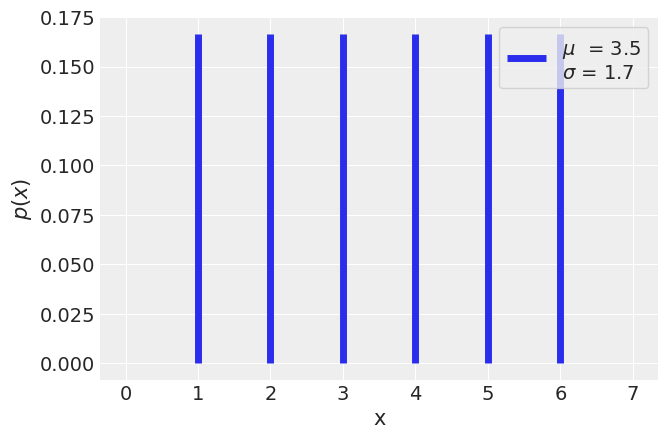

In [3]:
distri = stats.randint(1, 7)  # l√≠mite inferior, l√≠mite superior + 1
x = np.arange(0, 8)
x_pmf = distri.pmf(x)  # la pmf evaluada para todos los "x"
media, varianza = distri.stats(moments='mv')
plt.vlines(x,  0, x_pmf, colors='C0', lw=5,
           label='$\mu$  = {:3.1f}\n$\sigma$ = {:3.1f}'.format(float(media),
                                                                 float(varianza)**0.5))
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribuci√≥n binomial

Es la [distribuci√≥n](https://en.wikipedia.org/wiki/Binomial_distribution) de probabilidad discreta que cuenta el n√∫mero de √©xitos en una secuencia de $n$ ensayos de Bernoulli (experimentos si/no) independientes entre s√≠, con una probabilidad fija $p$ de ocurrencia del √©xito entre los ensayos.
Cuando $n=1$ esta distribuci√≥n se reduce a la distribuci√≥n de Bernoulli.

$$p(x \mid n,p) = \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x} \tag {0.7}$$$

El t√©rmino $p^x(1-p)^{n-x}$ indica la probabilidad de obtener $x$ √©xitos en $n$ intentos. Este t√©rmino solo tiene en cuenta el n√∫mero total de √©xitos obtenidos pero no la secuencia en la que aparecieron. El primer t√©rmino conocido como **coeficiente binomial** calcula todas las posibles combinaciones de $n$ en $x$, es decir el n√∫mero de subconjuntos de $x$ elementos escogidos de un conjunto con $n$ elementos.

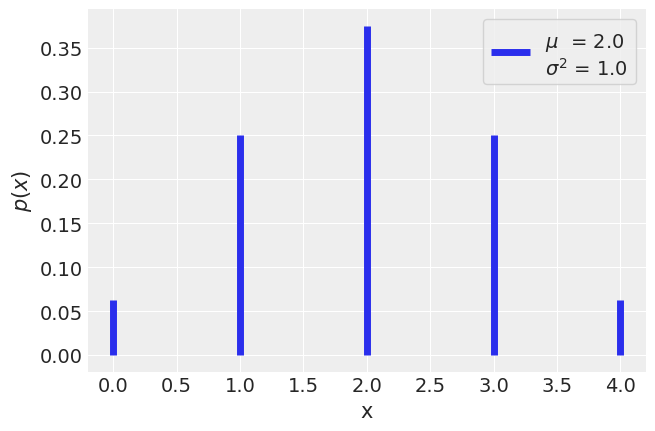

In [4]:
n = 4  # n√∫mero de intentos
p = 0.5  # probabilidad de "√©xitos"
distri = stats.binom(n, p)  
x = np.arange(0, n + 1)
x_pmf = distri.pmf(x)  # la pmf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.vlines(x,  0, x_pmf, colors='C0', lw=5,
           label='$\mu$  = {:3.1f}\n$\sigma^2$ = {:3.1f}'.format(float(media),
                                                                 float(varianza**0.5)))
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribuci√≥n de Poisson

Es una [distribuci√≥n](https://en.wikipedia.org/wiki/Poisson_distribution) de probabilidad discreta que expresa la probabilidad que $x$ eventos sucedan en un intervalo fijo de tiempo (o espacio o volumen) cuando estos eventos suceden con una taza promedio $\mu$ y de forma independiente entre si. Se la utiliza para modelar eventos con probabilidades peque√±as (sucesos _raros_) como accidentes de tr√°fico o decaimiento radiactivo.

$$
p(x \mid \mu) = \frac{\mu^{x} e^{-\mu}}{x!} \tag {0.8}$
$$

Tando la media como la varianza de esta distribuci√≥n est√°n dadas por $\mu$. 

A medida que $\mu$ aumenta la distribuci√≥n de Poisson se aproxima a una distribuci√≥n Gaussiana (aunque sigue siendo discreta). La distribuci√≥n de Poisson tiene estrecha relaci√≥n con otra distribuci√≥n de probabilidad, la binomial. Una distribuci√≥n binomial puede ser aproximada con una distribuci√≥n de Poisson, cuando $n >> p$, es decir, cuando la cantidad de "√©xitos" ($p$) es baja respecto de la cantidad de "intentos" (p) entonces $Poisson(np) \approx Binon(n, p)$.  Por esta raz√≥n la distribuci√≥n de Poisson tambi√©n se conoce como "ley de los peque√±os n√∫meros" o "ley de los eventos raros". Ojo que esto no implica que $\mu$ deba ser peque√±a, quien es peque√±o/raro es $p$ respecto de $n$.

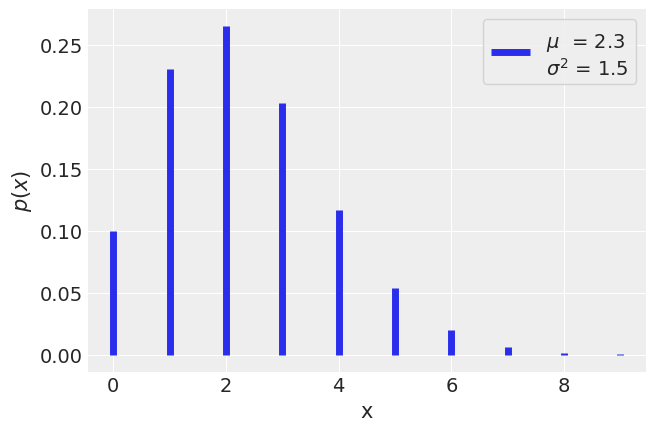

In [5]:
distri = stats.poisson(2.3)  # occurrencia media del evento
x = np.arange(0, 10)
x_pmf = distri.pmf(x)  # la pmf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.vlines(x,  0, x_pmf, colors='C0', lw=5,
           label='$\mu$  = {:3.1f}\n$\sigma^2$ = {:3.1f}'.format(float(media),
                                                                 float(varianza**0.5)))
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

### Variables aleatorias y distribuciones de probabilidad continuas

Hasta ahora hemos visto variables aleatorias discretas y distribuciones de masa de probabilidad. Existe otro tipo de variable aleatoria que es muy usado y son las llamadas variables aleatorias continuas, ya que toman valores en $\mathbb{R}$.

La diferencia m√°s importante entre variables aleatoria discretas y continuas es que para las continuas $P(X=x) = 0$, es decir, la probabilidad de cualquier valor es exactamente 0.

En las gr√°ficas anteriores, para variables discretas, es la altura de las lineas lo que define la probabilidad de cada evento. Si sumamos las alturas siempre obtenemos 1, es decir la suma total de las probabilidades. En una distribuci√≥n continua no tenemos _lineas_ si no que tenemos una curva continua, la altura de esa curva es la _densidad de probabilidad_. Si queremos averiguar cuanto m√°s probable es el valor $x_1$ respecto de $x_2$ basta calcular:

$$\frac{pdf(x_1)}{pdf(x_2)} \tag {0.9}$$$

Donde $pdf$ es la funci√≥n de densidad de probabilidad (por su sigla en ingl√©s). Y es an√°loga a la $pmf$ que vimos para variables discretas. Una diferencia importante es que la $pdf(x)$ puede ser mayor a 1. Para obtener una probabilidad a partir de una pdf debemos integrar en un intervalo dado, ya que es el √°rea bajo la curva y no la altura lo que nos da la probabilidad, es decir es esta integral la que debe dar 1.

$$P(a \lt X \lt b) =  \int_a^b pdf(x) dx$$

En muchos textos es com√∫n usar $p$ para referirse a la probabilidad de un evento en particular o a la $pmf$ o a la $pdf$, esperando que la diferencia se entienda por contexto.

A continuaci√≥n veremos varias distribuciones continuas. La curva azul representa la $pdf$, mientras que el histograma (en naranja) representan muestras tomadas a partir de cada distribuci√≥n. Al igual que con los ejemplos anteriores de distribuciones discretas. Se indican la media ($\mu$) y desviaci√≥n est√°ndar ($\sigma$) de las distribuciones, tambi√©n en este caso recalcamos que estos valores NO son calculados a partir de _datos_ si no que son los valores exactos (calculados anal√≠ticamente) que le corresponden a cada distribuci√≥n.

#### Distribuci√≥n uniforme

A√∫n siendo simple, la distribuci√≥n [uniforme](https://en.wikipedia.org/wiki/Uniform_distribution_%28continuous%29) es muy usada en estad√≠stica, por ej para representar nuestra ignorancia sobre el valor que pueda tomar un par√°metro. La distribuci√≥n uniforme tiene entrop√≠a cero (todos los estados son igualmente probables).

$$
p(x \mid a,b)=\begin{cases} \frac{1}{b-a} & para\ a \le x \le b \\ 0 &  \text{para el resto} \end{cases} \tag {0.10}$
$$

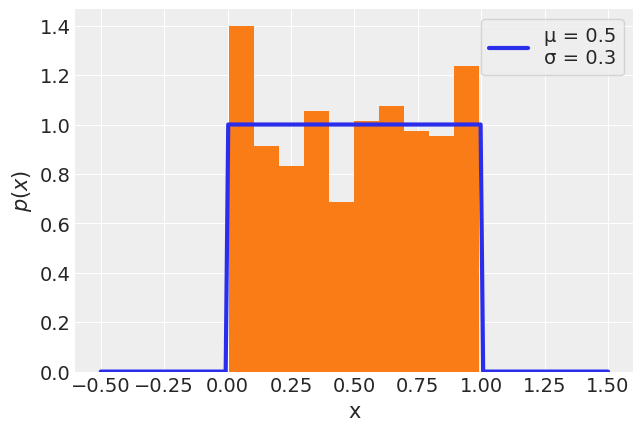

In [6]:
distri = stats.uniform(0, 1)  # distribuci√≥n uniforme entre a=0 y b=1
x = np.linspace(-0.5, 1.5, 200)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribuci√≥n
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=3,
          label=f'Œº = {media:3.1f}\nœÉ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribuci√≥n Gaussiana (o normal)

Es quiz√° la [distribuci√≥n](https://en.wikipedia.org/wiki/Normal_distribution) m√°s conocida. Por un lado por que muchos fen√≥menos pueden ser descriptos (aproximadamente) usando esta distribuci√≥n. Por otro lado por que posee ciertas propiedades matem√°ticas que facilitan trabajar con ella de forma anal√≠tica. Es por ello que muchos de los resultados de la estad√≠stica frecuentista se basan en asumir una distribuci√≥n Gaussiana.

La distribuci√≥n Gaussiana queda definida por dos par√°metros, la media $\mu$ y la desviaci√≥n est√°ndar $\sigma$. Una distribuci√≥n Gaussiana con $\mu = 0$ y $\sigma = 1$ es conocida como la _distribuci√≥n Gaussiana est√°ndar_.

$$
p(x \mid \mu,\sigma) = \frac{1}{\sigma \sqrt{ 2 \pi}} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2}} \tag {0.11}
$$

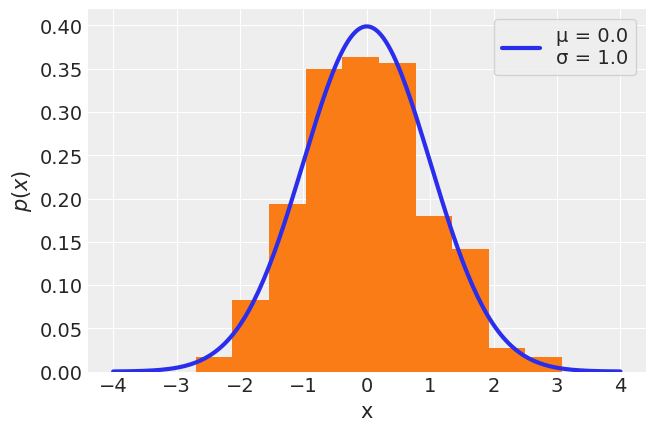

In [7]:
distri = stats.norm(loc=0, scale=1)  # media cero y desviaci√≥n standard 1
x = np.linspace(-4, 4, 200)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribuci√≥n
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=3,
          label=f'Œº = {media:3.1f}\nœÉ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribuci√≥n t de Student

Hist√≥ricamente esta [distribuci√≥n](http://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student) surgi√≥ para estimar la media de una poblaci√≥n normalmente distribuida cuando el tama√±o de la muestra es peque√±o. En estad√≠stica Bayesiana su uso m√°s frecuente es el de generar modelos robustos a datos aberrantes.


$$p(x \mid \nu,\mu,\sigma) = \frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})\sqrt{\pi\nu}\sigma} \left(1+\frac{1}{\nu}\left(\frac{x-\mu}{\sigma}\right)^2\right)^{-\frac{\nu+1}{2}} \tag {0.12}
$$

donde $\Gamma$ es la funci√≥n [gamma](https://en.wikipedia.org/wiki/Gamma_function) y donde $\nu$ es un par√°metro llamado _grados de libertad_ en la mayor√≠a de los textos aunque tambi√©n se le dice _grado de normalidad_, ya que a medida que $\nu$ aumenta la distribuci√≥n se aproxima a una Gaussiana. En el caso extremo de $\lim_{\nu\to\infty}$ la distribuci√≥n es exactamente igual a una Gaussiana.

En el otro _extremo_, cuando $\nu=1$, (aunque en realidad $\nu$ puede tomar valores por debajo de 1) estamos frente a una distribuci√≥n de [Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution). Es similar a una Gaussiana pero las colas decrecen muy lentamente, eso provoca que en teor√≠a esta distribuci√≥n no poseen una media o varianza definidas. Es decir, es posible calcular a partir de un conjunto de datos una media, pero si los datos provienen de una distribuci√≥n de Cauchy, la dispersi√≥n alrededor de la media ser√° alta y esta dispersi√≥n no disminuir√° a medida que aumente el tama√±o de la muestra. La raz√≥n de este comportamiento extra√±o es que en distribuciones como la Cauchy est√°n dominadas por lo que sucede en las colas de la distribuci√≥n, contrario a lo que sucede por ejemplo con la distribuci√≥n Gaussiana.

Para esta distribuci√≥n $\sigma$ no es la desviaci√≥n est√°ndar, que como ya se dijo podr√≠a estar indefinida, $\sigma$ es la _escala_. A medida que $\nu$ aumenta la _escala_ converge a la desviaci√≥n est√°ndar de una distribuci√≥n Gaussiana.

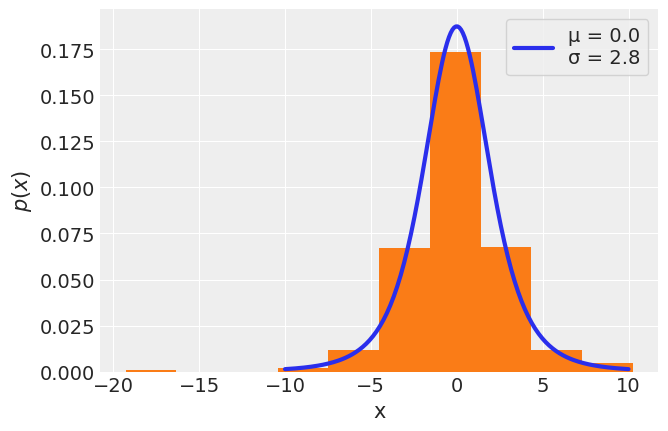

In [8]:
distri = stats.t(loc=0, scale=2, df=4) # media 0, escala 2, grados de libertad 4
x = np.linspace(-10, 10, 200)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribuci√≥n
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=3,
          label=f'Œº = {media:3.1f}\nœÉ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribuci√≥n exponencial

La distribuci√≥n [exponencial](https://en.wikipedia.org/wiki/Exponential_distribution) se define solo para $x > 0$. Esta distribuci√≥n se suele usar para describir el tiempo que transcurre entre dos eventos que ocurren de forma continua e independiente a una taza fija. El n√∫mero de tales eventos para un tiempo fijo lo da la distribuci√≥n de Poisson.

$$
p(x \mid \lambda) = \lambda e^{-\lambda x} \tag {0.13}
$$

La media y la desviaci√≥n est√°ndar de esta distribuci√≥n est√°n dadas por $\frac{1}{\lambda}$ 

Scipy usa una parametrizaci√≥n  diferente donde la escala es igual a $\frac{1}{\lambda}$

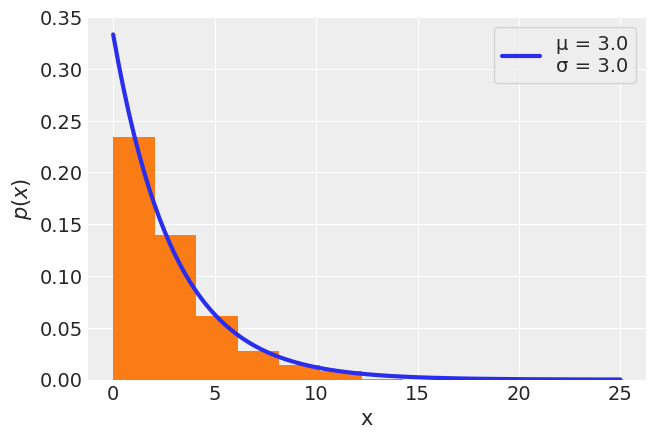

In [9]:
distri = stats.expon(scale=3)  # escala 3, lambda = 1/3
x = np.linspace(0, 25, 100)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribuci√≥n
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=3,
          label=f'Œº = {media:3.1f}\nœÉ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribuci√≥n de Laplace

Tambi√©n llamada distribuci√≥n [doble exponencial](https://en.wikipedia.org/wiki/Laplace_distribution), ya que puede pensarse como una distribucion exponencial "m√°s su imagen especular". Esta distribuci√≥n surge de medir la diferencia entre dos variables exponenciales (id√©nticamente distribuidas). 

$$p(x \mid \mu, b) = \frac{1}{2b} \exp \left\{ - \frac{|x - \mu|}{b} \right\} \tag {0.14}$$


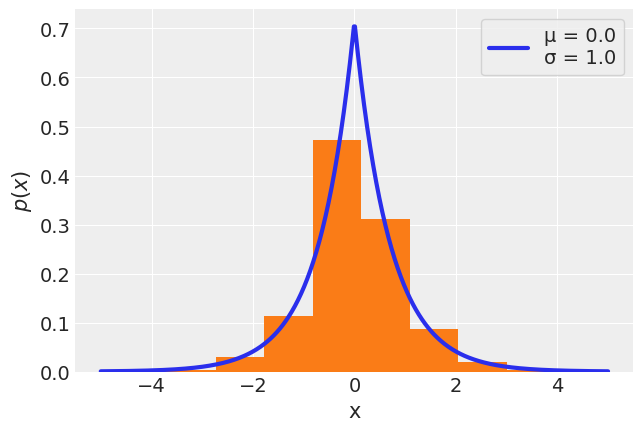

In [10]:
distri = stats.laplace(0, 0.7)  # escala 3, lambda = 1/3
x = np.linspace(-5, 5, 500)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribuci√≥n
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=3,
          label=f'Œº = {media:3.1f}\nœÉ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribuci√≥n beta

Es una [distribuci√≥n](https://en.wikipedia.org/wiki/Beta_distribution) definida en el intervalo [0, 1]. Se usa para modelar el comportamiento de variables aleatorias limitadas a un intervalo finito. Es √∫til para modelar proporciones o porcentajes. 

$$
p(x \mid \alpha, \beta)= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, x^{\alpha-1}(1-x)^{\beta-1} \tag {0.15}
$$

El primer t√©rmino es simplemente una constante de normalizaci√≥n que asegura que la integral de la $pdf$ de 1. $\Gamma$ es la funci√≥n [gamma](https://en.wikipedia.org/wiki/Gamma_function). Cuando $\alpha=1$ y $\beta=1$ la distribuci√≥n beta se reduce a la distribuci√≥n uniforme.

Si queremos expresar la distribuci√≥n beta en funci√≥n de la media y la dispersi√≥n alrededor de la media podemos hacerlo de la siguiente forma.

$$\alpha = \mu \kappa$$
$$\beta = (1 ‚àí \mu) \kappa$$

Siendo $\mu$ la media y $\kappa$ una par√°metro llamado concentraci√≥n a media que $\kappa$ aumenta la dispersi√≥n disminuye. Notese, adem√°s que $\kappa = \alpha + \beta$.

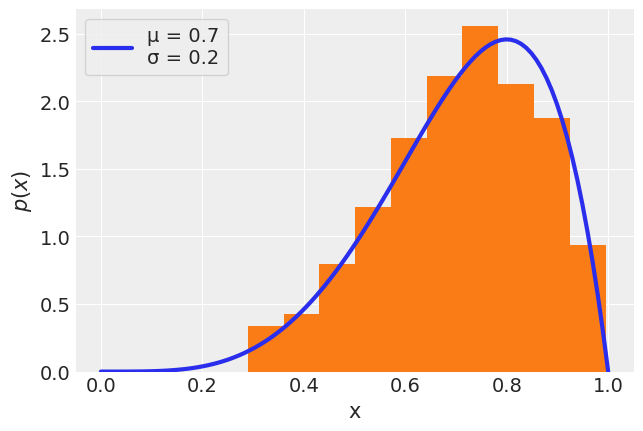

In [11]:
distri = stats.beta(5, 2)  # alfa=5, beta=2
x = np.linspace(0, 1, 100)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribuci√≥n
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=3,
          label=f'Œº = {media:3.1f}\nœÉ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribuci√≥n Gamma

Scipy parametriza a la distribuci√≥n [gamma](https://en.wikipedia.org/wiki/Gamma_distribution) usando un par√°metro $\alpha$ y uno $\theta$, usando estos par√°metros la $pdf$ es:

$$
p(x \mid \alpha, \theta) = \frac{1}{\Gamma(\alpha) \theta^\alpha} x^{\alpha \,-\, 1} e^{-\frac{x}{\theta}} \tag {0.16}
$$

Una parametrizaci√≥n m√°s com√∫n en estad√≠stica Bayesiana usa los par√°metros $\alpha$ y  $\beta$, siendo $\beta = \frac{1}{\theta}$. En este caso la pdf queda como:

$$
p(x \mid \alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)} \tag {0.17}
$$


La distribuci√≥n gamma se reduce a la exponencial cuando $\alpha=1$.

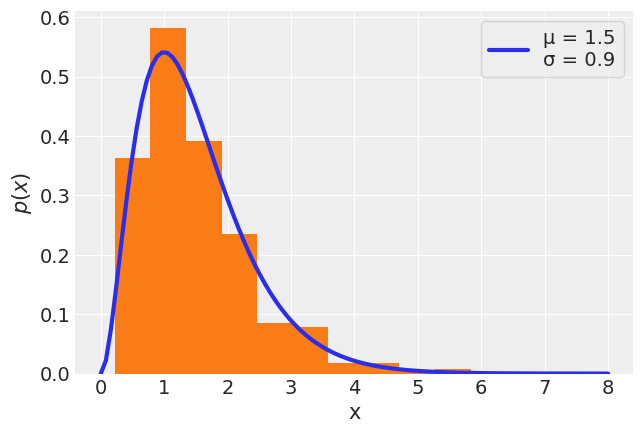

In [12]:
distri = stats.gamma(a=3, scale=0.5)  # alfa 3, theta 0.5
x = np.linspace(0, 8, 100)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribuci√≥n
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=3,
          label=f'Œº = {media:3.1f}\nœÉ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

### Relaci√≥n entre probabilidad conjunta, condicional y marginal

Al definir probabilidad condicional usamos la _expresi√≥n 0.5_. Ahora que ya estamos familiarizados con las distribuciones de probabilidad podemos representar gr√°ficamente los tres t√©rminos en la _expresi√≥n 0.5_, tal como se muestra en la siguiente figura.

<img src="img/probabilidades.png" width=500>

* Probabilidad conjunta $p(A, B)$
* Probabilidad marginal $p(A)$ o $p(B)$ 
* Probabilidad condicional $p(A \mid B)$

Podemos re-escribir la _expresi√≥n 0.5_ de la siguiente manera:

$$
p(A, B) = p(A \mid B) {p(B)}  \tag {0.18}
$$

Es decir si tomo una probabilidad condicional y la _evaluo_ para todos los valores de la cantidad _condicionante_ ($B$ en este caso), obtengo la distribuci√≥n conjunta. Esto se puede ver graficamente si pensamos que $p(A \mid B)$ es una _rebanada_ de p(A, B); rebanada que tomamos _a la altura_ de $B$. Si tomamos todas las rebanadas entonces obtendremos $p(A, B)$.

Para obtener las probabilidades marginales, que se encuentran en los _margenes_ üòâ, podemos calcular algo similar:

$$
p(A) = \sum_B p(A, B) = \sum_B p(A \mid B) {p(B)} \tag {0.19}
$$ 

Cambiando la sumatoria por una integral para distribuciones continuas.

### Distribuci√≥n acumulada

La $pdf$ (o la $pmf$) son formas comunes de representar y trabajar con variables aleatorias, pero no son las √∫nicas formas posibles. Existen otras representaciones equivalentes. Por ejemplo la funci√≥n de distribuci√≥n acumulada ($cdf$ en ingl√©s). Al integrar una $pdf$ se obtiene la correspondiente $cdf$, y al derivar la $cdf$ se obtiene la $pdf$.


La integral de la $pdf$ es llamada funci√≥n de distribuci√≥n acumulada ($cdf$):

$$
cdf(x) = \int_{-\infty}^{x} pdf(x) d(x) \tag {0.20}
$$

En algunas situaciones se prefiere hablar de la funci√≥n de supervivencia:

$$
S(x) = 1 - cdf  \tag {0.21}
$$


A continuaci√≥n un ejemplo de la $pdf$ y $cdf$ para 4 distribuciones de la familia Gaussiana.

Text(0.5, 0, 'x')

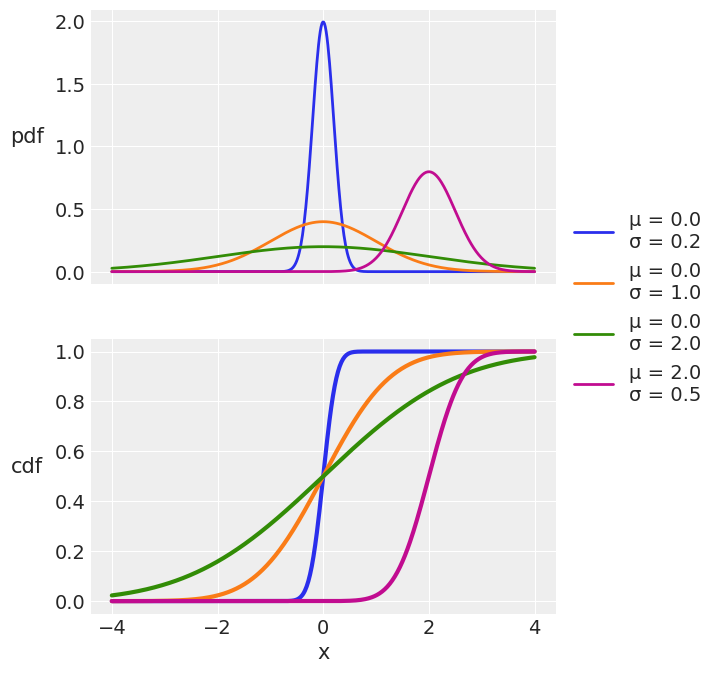

In [13]:
_, ax = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
x_valores = np.linspace(-4, 4, 500)
valores = [(0., .2), (0., 1.), (0., 2.), (2., .5)]
color = ['C0', 'C1', 'C2', 'C3']
for val, c in zip(valores, color):
    pdf = stats.norm(*val).pdf(x_valores)
    cdf = stats.norm(*val).cdf(x_valores)
    ax[0].plot(x_valores, pdf, lw=2, color=c,
               label=f'Œº = {val[0]}\nœÉ = {val[1]}')
    ax[1].plot(x_valores, cdf, lw=3, color=c)
ax[0].set_ylabel('pdf', rotation=0, labelpad=20)
ax[0].legend(bbox_to_anchor=(1.35, 0.33))
ax[1].set_ylabel('cdf', rotation=0, labelpad=20)
ax[1].set_xlabel('x')


La siguiente figura tomada del libro [Think Stats](http://greenteapress.com/thinkstats2/html/index.html) resume las relaciones entre la $cdf$, $pdf$ y $pmf$.

<img src='img/cmf_pdf_pmf.png' width=600 >

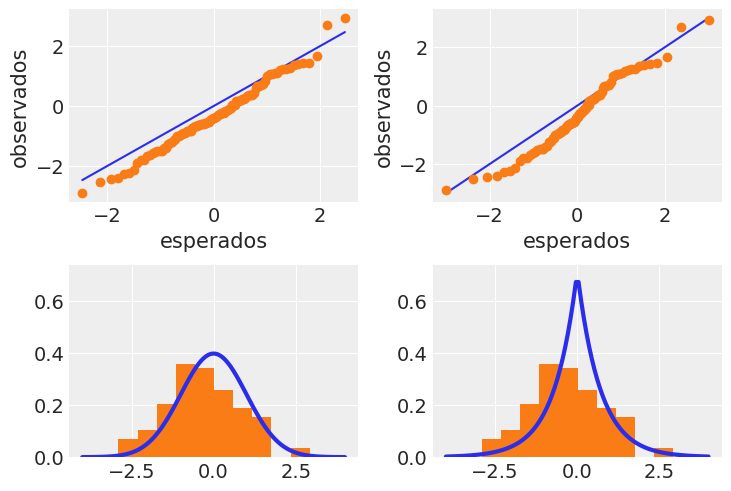

In [14]:
muestra = np.random.normal(0, 1, 100)
dist = stats.norm(0, 1), stats.laplace(scale=0.7)
x = np.linspace(-4, 4, 100)
dist_pdf = dist[0].pdf(x), dist[1].pdf(x)


_, ax = plt.subplots(2, 2, constrained_layout=True)
for i in range(2):
    osm, osr = stats.probplot(muestra, fit=False, dist=dist[i])
    ax[0,i].plot(osm, osm)
    ax[0,i].plot(osm, osr, 'o')
    ax[0,i].set_xlabel('esperados')
    ax[0,i].set_ylabel('observados')
    ax[1, i].plot(x, dist_pdf[i], lw=3)
    ax[1, i].hist(muestra, density=True)
    ax[1, i].set_ylim(0, np.max(dist_pdf) * 1.1)

## L√≠mites 

Los dos teorem√°s m√°s conocidos y usados en probabilidad son la ley de los grande n√∫meros y el teorema del l√≠mite central. Ambos nos dicen que le sucede a la media muestral a medida que el tama√±o de la muestra aumenta.

### La ley de los grandes n√∫meros

El valor promedio calculado para una muestra converge al valor esperado (media) de dicha distribuci√≥n. Esto no es cierto para algunas distribuciones como la distribuci√≥n de Cauchy (la cual no tiene media ni varianza finita).

La ley de los grandes n√∫meros se suele malinterpretar y dar lugar a la paradoja del apostador. Un ejemplo de esta paradoja es creer que conviene apostar en la loter√≠a/quiniela a un n√∫mero _atrasado_, es decir un n√∫mero que hace tiempo que no sale. El razonamiento, err√≥neo, es que como todos los n√∫meros tienen la misma probabilidad a largo plazo si un n√∫mero viene _atrasado_ entonces hay alguna especie de fuerza que aumenta la probabilidad de ese n√∫mero en los pr√≥ximo sorteos para as√≠ re-establecer la equiprobabilidad de los n√∫meros.

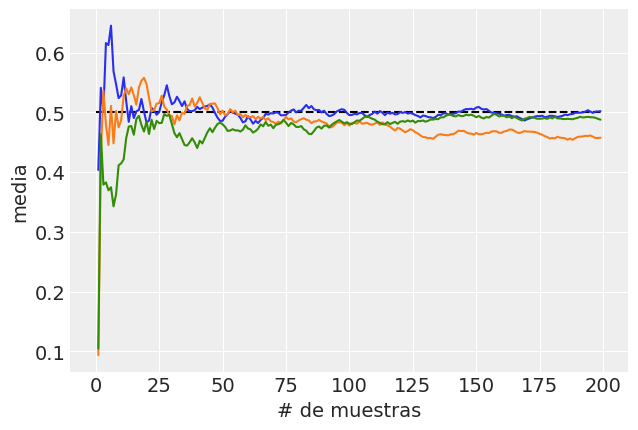

In [15]:
tama√±o_muestra = 200
muestras = range(1, tama√±o_muestra)
dist = stats.uniform(0, 1)
media_verdadera = dist.stats(moments='m')

for _ in range(3):
    muestra = dist.rvs(tama√±o_muestra)
    media_estimada = [muestra[:i].mean() for i in muestras]
    plt.plot(muestras, media_estimada, lw=1.5)

plt.hlines(media_verdadera, 0, tama√±o_muestra, linestyle='--', color='k')
plt.ylabel("media", fontsize=14)
plt.xlabel("# de muestras", fontsize=14);

### El teorema central del l√≠mite

El teorema central del l√≠mite (tambi√©n llamado teorema del l√≠mite central) establece que si tomamos $n$ valores (de forma independiente) de una distribuci√≥n arbitraria la media $\bar X$ de esos valores se _distribuir√° aproximadamente como_ una Gaussiana a medida que ${n \rightarrow \infty}$:

$$
\bar X_n \dot\sim \mathcal{N} \left(\mu,  \frac{\sigma^2}{n}\right) \tag {0.22}
$$

Donde $\mu$ y $\sigma^2$ son la media y varianza poblacionales.

Para que el teorema del l√≠mite central se cumpla se deben cumplir los siguientes supuestos:

1. Las variables se muestrean de forma independiente
1. Las variables provienen de la misma distribuci√≥n
1. La media y la desviaci√≥n est√°ndar de la distribuci√≥n tiene que ser finitas

Los criterios 1 y 2 se pueden relajar _bastante_ y a√∫n as√≠ obtendremos aproximadamente una Gaussiana, pero del criterio 3 no hay forma de escapar. Para distribuciones como la distribuci√≥n de Cauchy, que no posen media ni varianza definida este teorema no se aplica. El promedio de $N$ valores provenientes de una distribuci√≥n Cauchy no siguen una Gaussiana sino una distribuci√≥n de Cauchy.

El teorema del l√≠mite central explica la prevalencia de la distribuci√≥n Gaussiana en la naturaleza. Muchos de los fen√≥menos que estudiamos se pueden explicar como fluctuaciones alrededor de una media, o ser el resultado de la suma de muchos factores diferentes. Adem√°s, las Gaussianas son muy comunes en probabilidad, estad√≠stica y _machine learning_ ya que que esta familia de distribuciones son m√°s simples de manipular matem√°ticamente que muchas otras distribuciones.

A continuaci√≥n vemos una simulaci√≥n que nos muestra el teorema del l√≠mite central en acci√≥n.

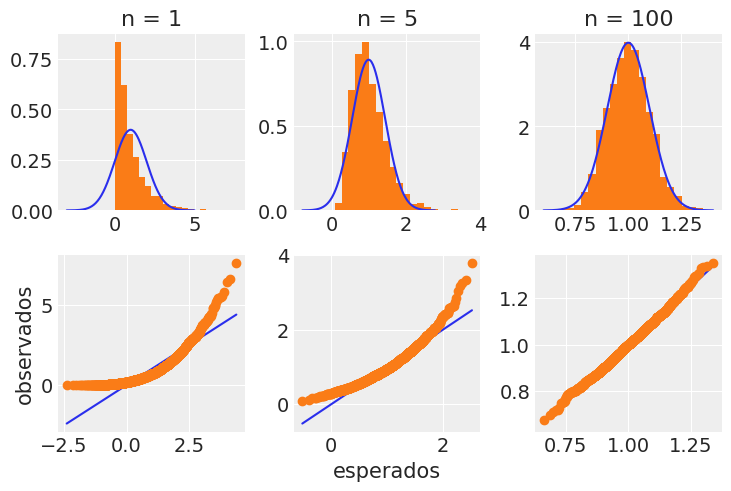

In [16]:
iters = 2000
distri = stats.expon(scale=1)
media, var = distri.stats(moments='mv')

_, ax = plt.subplots(2, 3, constrained_layout=True)

for i, n in enumerate([1, 5, 100]):
    sample = np.mean(distri.rvs((n, iters)), axis=0)

    sd = (var/n)**0.5 
    x = np.linspace(media - 4 * sd, media + 4 * sd, 200)
    ax[0, i].plot(x, stats.norm(media, sd).pdf(x))
    ax[0, i].hist(sample, density=True, bins=20)
    ax[0, i].set_title('n = {}'.format(n))
    osm, osr = stats.probplot(sample, dist=stats.norm(media, sd), fit=False)
    ax[1, i].plot(osm, osm)
    ax[1, i].plot(osm, osr, 'o')
ax[1, 0].set_ylabel('observados')
ax[1, 1].set_xlabel('esperados');

## Ejercicios

1. Siguiendo los axiomas de Kolmogorov
    * Por qu√© la probabilidades no pueden ser mayores a 1? 
1. Seg√∫n la definici√≥n de probabilidad condicional
    * Cual es el valor de $P(A \mid A)$?
    * Cual es la probabilidad de $P(A, B)$?
    * Cual es la probabilidad de $P(A, B)$ en el caso especial que $A$ y $B$ sean independientes? 
    * Cuando se cumple que $P(A \mid B) = P(A)$?
    * Es posible que $P(A \mid B) > P(A)$, cuando?
    * Es posible que $P(A \mid B) < P(A)$, cuando?

 Los siguientes ejercicios se deben realizar usando Python (y NumPy, SciPy, Matplotlib)
1. Ilustar que la distribuci√≥n de Poisson se aproxima a una binomial cuando para la binomial $n >> p$.

1. Para alguna de las distribuciones discretas presentadas en esta notebook verificar que la probabilidad total es 1.

1. Para alguna de las distribuciones continuas presentadas en esta notebook verificar que el √°rea bajo la curva es 1.

1. Obtener la cdf a partir de la pdf (usar el m√©todo pdf provisto por SciPy). La funci√≥n `np.cumsum` puede ser de utilidad.

1. Obtener la pdf a partir de la cdf (usar el m√©todo cdf provisto por SciPy). La funci√≥n `np.diff` puede ser de utilidad.

1. Repetir la simulaci√≥n para la ley de los grandes n√∫meros para al menos 3 distribuciones de probabilidad. Para cada distribuci√≥n probar m√°s de un conjunto de param√©tros.

1. Repetir la simulaci√≥n para el teorema central del l√≠mite para al menos 3 distribuciones de probabilidad. Para cada distribuci√≥n probar m√°s de un conjunto de param√©tros.

1. Mostrar en un gr√°fico que la media $\bar X$ converge a $\mu$ y la varianza converge a $\frac{\sigma^2}{n}$ a medida que aumenta el tama√±o de la muestra.